## Example using ENSO indices

Download the .txt data from the Climate Prediction Center website:
http://www.cpc.ncep.noaa.gov/data/indices/ersst4.nino.mth.81-10.ascii

(This file is also available in the week2 folder on the seminar webpage.)

In [1]:
# import the necessary libraries
import numpy
import scipy
import matplotlib.pyplot as mp

%matplotlib inline

In [2]:
filename = 'ersst4.nino.mth.81-10.ascii.txt'
data = numpy.loadtxt(filename, skiprows=1)

# the first column [0] is the year of the data set
# the ninth column [9] is the Nino3.4 index
print(data.shape)

years = data[:,0]
nino34 = data[:,8]
nino34_ctd = nino34 - nino34.mean()

print(years.shape)

(795, 10)
(795,)


### Use the ```datetime``` module in Python to handle dates and timeseries

This file contains monthly averages of ENSO indices.  The time is only given as the year, however, so we must convert 

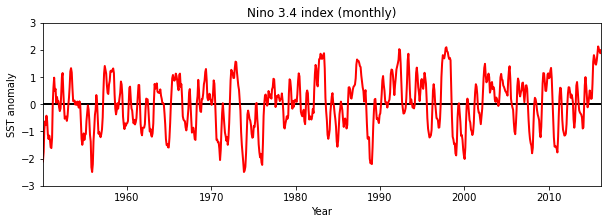

In [3]:
import datetime
ntime = years.shape[0] # shape of time series
nyears_whole = years.shape[0]//12 # number of WHOLE years (2016 is incomplete...)
months = numpy.tile(numpy.arange(1,13), nyears_whole+1)
orig_date = datetime.date(1950,1,15)
year_month_list = []
for i in range(ntime):
    year_month_list.append(datetime.date( int(years[i]), int(months[i]) ,15))

fig = mp.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)
ax.plot(year_month_list,nino34_ctd, color='red', lw=2, zorder=2) # a higher zorder means the line will sit over others
ax.set_xlabel('Year')
ax.set_ylabel('SST anomaly')
ax.set_ylim(-3,3)
ax.set_xlim(year_month_list[0],year_month_list[-1])
ax.set_title('Nino 3.4 index (monthly)')
ax.axhline(y=0, color='black', ls='-', lw=2, zorder=1)

**Create a moving or rolling average using the ```pandas``` module, which comes with the Anaconda distribution.**

Note pandas is the Python Data Analysis Library and is *distinct* from NumPy and SciPy but provides a lot of complementary functions:  http://pandas.pydata.org/

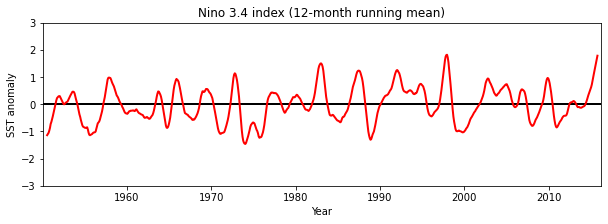

In [4]:
import pandas

nino34_ctd_12month = pandas.DataFrame(nino34_ctd).rolling(window=12,center=True).mean()

fig = mp.figure(figsize=(10,3))
ax = fig.add_subplot(1,1,1)
ax.plot(year_month_list,nino34_ctd_12month, color='red', lw=2, zorder=2)
ax.set_xlabel('Year')
ax.set_ylabel('SST anomaly')
ax.set_ylim(-3,3)
ax.set_xlim(year_month_list[0],year_month_list[-1])
ax.set_title('Nino 3.4 index (12-month running mean)')
ax.axhline(y=0, color='black', ls='-', lw=2, zorder=1)